## Environmental Racism and Twitter Archiving
### Matthew Lach
For this assigment, I will be making wordmaps and sentiment analysis plots using keywords from tweets related to my project. First, I will analyze some key terms surrounding the concept of environmental racism in Los Angeles. This will be done using tweepy to get tweets. Next, I will do one specific case study surrounding Exide lead contamination in Vernon, CA (Southeast LA) ands it impact on working-class hispanic residents. This is important for advancing my historical research and context about environmental justice in LA. I will get these past tweets by using SNScraper to scrape tweets.



### Import Packages and Authenticate Twitter Account

In [1]:
# misc
import pandas as pd
import numpy as np
import plotly.express as px
import osmnx as ox
import matplotlib.pyplot as plt

# for tweets
import tweepy as tw

# for sentiment analysis
from textblob import TextBlob
import re

# for word clouds
from wordcloud import WordCloud, STOPWORDS

# for scraper
import csv

In [2]:
# twitter keys/secrets/tokens
consumer_key= 'wgWHthw68S8LEsYq8qa036rnm'
consumer_secret= 'KlHEFvxBhJAFqNsTl2QrhTQCuMSY7JTzJmq5TS9bt63Cn2Uc3Z'
access_token= '1362150830028197889-zmuITle2NwRiEOaUth4orTT2dIVbRz'
access_token_secret= 'htMsSefOIg7h4N2ott5UHQAbWSA4EMzZBstOPjxXLYCrX'

In [3]:
# twitter authentication
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### Key Word: Environmental Racism
Since my topic is environmental racism in the Los Angeles County area, my first Twitter search is of the term "environmental racism". I will search for a max of 500 tweets within 100 km of Los Angeles taht contain the given term.

In [4]:
searchterm = 'environmental racism'
q = searchterm + ' -filter:retweets'
max_tweets = 500
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='34.068921,-118.4473751,100km',
                   tweet_mode='extended').items(max_tweets)

In [5]:
print(tweets)

The results of the tweepy output are a json that we can covert into a dataframe to more easily read and access the data.

In [6]:
# create json from tweepy
json_data = [tweet._json for tweet in tweets]

In [7]:
# create dataframe from json 
df = pd.json_normalize(json_data)
# look at data
df.head()

created_at                   id               id_str  \
0  Fri Feb 26 02:11:33 +0000 2021  1365122298747908096  1365122298747908096   
1  Thu Feb 25 18:58:11 +0000 2021  1365013239852003330  1365013239852003330   
2  Thu Feb 25 18:44:00 +0000 2021  1365009670113484801  1365009670113484801   
3  Thu Feb 25 18:40:36 +0000 2021  1365008812332097536  1365008812332097536   
4  Thu Feb 25 18:33:24 +0000 2021  1365007003492315136  1365007003492315136   

                                           full_text  truncated  \
0  Bill that aims to address environmental racism...      False   
1  We need to have a broader conversation about t...      False   
2  .@POTUS &amp; his Admin are starting off stron...      False   
3  "4)environmental racism, which has been enacte...      False   
4  Four driving areas that are impacting the heal...      False   

  display_text_range                                             source  \
0           [0, 108]  <a href="http://getbrandwhistle.com/" rel="nof...   
1           [0, 282]  <a href="https://mobile.twitter.com" rel="nofo...   
2           [0, 282]  <a href="https://mobile.twitter.com" rel="nofo...   
3           [0, 117]  <a href="https://mobile.twitter.com" rel="nofo...   
4           [0, 278]  <a href="https://mobile.twitter.com" rel="nofo...   

   in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id  ...  \
0                    NaN                      None                  NaN  ...   
1                    NaN                      None                  NaN  ...   
2                    NaN                      None                  NaN  ...   
3           1.365008e+18       1365008372857151489          774497418.0  ...   
4                    NaN                      None                  NaN  ...   

  quoted_status.is_quote_status quoted_status.retweet_count  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                           NaN                         NaN   
3                           NaN                         NaN   
4                           NaN                         NaN   

  quoted_status.favorite_count quoted_status.favorited  \
0                          NaN                     NaN   
1                          NaN                     NaN   
2                          NaN                     NaN   
3                          NaN                     NaN   
4                          NaN                     NaN   

  quoted_status.retweeted quoted_status.lang  \
0                     NaN                NaN   
1                     NaN                NaN   
2                     NaN                NaN   
3                     NaN                NaN   
4                     NaN                NaN   

   quoted_status.possibly_sensitive  quoted_status.entities.media  \
0                               NaN                           NaN   
1                               NaN                           NaN   
2                               NaN                           NaN   
3                               NaN                           NaN   
4                               NaN                           NaN   

   quoted_status.extended_entities.media  quoted_status.user.entities.url.urls  
0                                    NaN                                   NaN  
1                                    NaN                                   NaN  
2                                    NaN                                   NaN  
3                                    NaN                                   NaN  
4                                    NaN                                   NaN  

[5 rows x 150 columns]

In [8]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 150 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   created_at                                             26 non-null     object 
 1   id                                                     26 non-null     int64  
 2   id_str                                                 26 non-null     object 
 3   full_text                                              26 non-null     object 
 4   truncated                                              26 non-null     bool   
 5   display_text_range                                     26 non-null     object 
 6   source                                                 26 non-null     object 
 7   in_reply_to_status_id                                  6 non-null      float64
 8   in_reply_to_status_id_str                          

As we can see from .head and .info, there are 152 columns and we only need 3 of them for our analysis. Additionally, we see that there is not a huge sample size of people using the term environmental racism in Los Angeles. I also tried to include the terms "environmental justice" and "environmental injustice" in my search, but there was only a small increase in results.

#### Cleaning the data 

The next step is to remove unnecessary columns and rename them to our desired names.

In [9]:
# remove columns
df = df[['created_at','full_text','user.screen_name']]

# rename the remaining columns
df.columns = ['created_at','text','profile_name']

In order to use the tweet data for word clouds and sentiment analysis, we need to remove any strange characters that come with tweets. The function clean_tweet will serve this purpose. We will also add a new column in the dataframe for the new cleaned text.

In [10]:
# remove unwanted characters
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

In [11]:
# insert new column
df['clean_text'] = ''
# loop clean tweet function through each row
for i, row in df.iterrows():
    clean = clean_tweet(row.text)
    df.at[i,'clean_text'] = clean

In [12]:
# show full tweet in column
pd.set_option('display.max_colwidth', None)
df.sample(5)[['clean_text','text']]

clean_text  \
24                 COVID19 has already shown us how climate change and environmental racism work together to leave communities more vulnerable says another doctor The unequal ways in which our society is organized and structured in part dictates who lives and who dies   
18                                      Its your move the science is strong the on the ground effects of climate change are apparent the environmental racism that communities of color must endure is a habitual inequity We need to address it You need to take action Now   
25                                                                                                                                                                                                                     SZA Partners With TAZO To Combat Environmental Racism   
4   Four driving areas that are impacting the health and livelihoods of communities in South LA are 1Gentrification displacement and homeless 2 poverty disinvestment in joblessness 3 policing suppression deportationand mass incarceration 4 environmental racism SCGLive   
23                                                                                                                                                                                                                Sirtis Environmental racism is not a cute look on you girl   

                                                                                                                                                                                                                                                                                              text  
24                               “COVID-19 has already shown us how climate change and environmental racism work together to leave communities more vulnerable,” says another doctor. “The unequal ways in which our society is organized and structured in part dictates who lives and who dies.”  
18  It's your move .@CAgovernor .@GavinNewsom the science is strong, the on the ground effects of climate change are apparent, the environmental racism that communities of color must endure is a habitual inequity. We need to address it. You need to take action. Now. https://t.co/6J8UgwHyGh  
25                                                                                                                                                                                                                   SZA Partners With TAZO To Combat Environmental Racism https://t.co/NaKRfoY4NE  
4          Four driving areas that are impacting the health and livelihoods of communities in South LA are 1)Gentrification, displacement, and homeless; 2) poverty disinvestment in joblessness; 3) policing suppression, deportation,\nand mass incarceration; 4) environmental racism. #SCGLive  
23                                                                                                                                                                                                                            @Marina_Sirtis Environmental racism is not a cute look on you, girl.

#### Creating a Word Cloud
In order to look at the frequency of each word to make a word cloud, we need to combine all of the cleaned text into one variable.

In [13]:
# combine all tweets
all_text = ''.join(df['clean_text'])
all_text

'Bill that aims to address environmental racism heads for debate in House of CommonsWe need to have a broader conversation about the intersection between health joblessness homelessness environmental racism amp other issues They are not silo issues It is crucial we also look at the historical root causes and how the barriers began Benjamin Torresamp his Admin are starting off strong on EnvironmentalJustice but theres a lot of work to doJoined colleagues in coleading a letter to President Biden asking he take immediate action to end decades of inequity and environmental racism felt by frontline communities4environmental racism which has been enacted hand in hand with exclusionary housing Laura Muraida LAFour driving areas that are impacting the health and livelihoods of communities in South LA are 1Gentrification displacement and homeless 2 poverty disinvestment in joblessness 3 policing suppression deportationand mass incarceration 4 environmental racism SCGLiveWe are proud to endorse 

There are many common words that need to be removed from the word cloud so we establish a list of stop words. (For some reason I had to manually add the searchterm for it to be excluded)

In [14]:
# define stop words
list(STOPWORDS)
stop_words = ['environmental racism'] + ['environmental'] + ['racism'] + list(STOPWORDS)

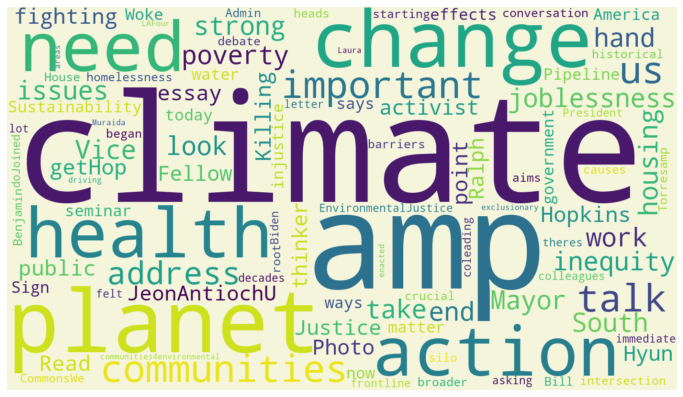

In [15]:
# make word cloud with 100 words
wordcloud = WordCloud(width=1400, 
                      height=800,
                      background_color="beige",
                      stopwords=stop_words,
                      max_words=100).generate(all_text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

I chose to limit the words to 100 instead of the default because of the limited number of tweets. The top terms appearing are "fossil fuel", "protect black", "Brown Communities". Additionally, a prominent phrase is "Vote YESonSB467". SB467 is a CA state bill that is primarily meant to protect POC communities from contamination and negative results from fossil fuels. As we can see, the main sentiment shown here is helping communities against environmental racism. I would assume a similar seach across the entirety of California would yield a similar result with "YESonSB467" featured prominently.

#### Sentiment Analysis
The next step is to analyze the senitment of the tweets using TextBlob. First, we insert a new column for the polarity of each tweet. The polarity is a value from -1 (most negative) to 1 (most positive).

In [16]:
# insert polarity column
df['polarity']=''


In [17]:
# loop TextBlob through each row 
for i, row in df.iterrows():
    a = TextBlob(row.clean_text)
    df.at[i,'polarity'] = a.polarity

Now that each row has a polarity value, we will assign it a sentiment value that categorizes the polarity values from very negative to very positive.

In [19]:
# list of sentiment conditions
conditions = [
    (df['polarity'] < -0.2), 
    (df['polarity'] < 0) & (df['polarity'] >= -0.2),   
    (df['polarity'] == 0),  #
    (df['polarity'] > 0) & (df['polarity'] <= 0.2),    
    (df['polarity'] > 0.2)  
]
# list of sentiment values
values = [
    'very negative', 
    'negative', 
    'neutral', 
    'positive',
    'very positive'
    ]

# use values and conditions to fill sentiment column 
df['sentiment'] = np.select(conditions, values)

In [20]:
# sample of new dataframe with sentiment
df.sample(5)[['clean_text','polarity','sentiment']]

clean_text  \
8                                             Earth is the only planet we getHop Hopkins in his essay Racism is Killing the Planet Read about this important activist and thinker amp Climate Justice Fellow at Photo by Hyun Ralph JeonAntiochU Sustainability AntiochProud   
14                                                                                                                                                                                                    Call to Action End environmental racism now StoryMaps FedGIS Nonprofit   
0                                                                                                                                                                                        Bill that aims to address environmental racism heads for debate in House of Commons   
4   Four driving areas that are impacting the health and livelihoods of communities in South LA are 1Gentrification displacement and homeless 2 poverty disinvestment in joblessness 3 policing suppression deportationand mass incarceration 4 environmental racism SCGLive   
15                                                                                          Environmental racism classism and injustice is happening right now in Memphis Join us to STOP the Byhalia Connection Pipeline Sign the petition and find other ways to help here   

     polarity sentiment  
8         0.2  positive  
14        0.1  positive  
0           0   neutral  
4           0   neutral  
15  0.0803571  positive

Before making a plot of the sentiment values, we will set the values of the sentiment cmap.

In [21]:
sentiment_colors = ox.plot.get_colors(5,cmap='PuBuGn',return_hex=True)

In [22]:
# create sentiment bar chart
fig = px.bar(df, 
             x='sentiment',
             width=600,
             title='Sentiment analysis for "'+ searchterm + '"',
             color='sentiment',
             category_orders = {'sentiment':['very negative','negative','neutral','positive','very positive']},
             color_discrete_sequence=sentiment_colors, 
            )
# remove white lines through plot
fig.update_traces(marker_line_width=0) 
fig.show()

Based on the results of this sentiment chart, there is no clear skew towards positive or negative sentiment. However, it is unclear what a negative or positive sentiment would be in terms of tweets containing the term. For example, there are tweets that are listing negative effects of environmental racism and some that are vouching for SB467. Despite the varying sentiment values, both of these tweets are recognizing the need to address environmental racism. On the other hand, there could be negatively and positively labeled tweets that are denouncing the notion of environmental racism. For this reason, it is important to look at the results of the word cloud and the text of the individual tweets given how small this dataset is. 

Next, we will make a histogram of the polarity values in order to see the spread of sentiments.

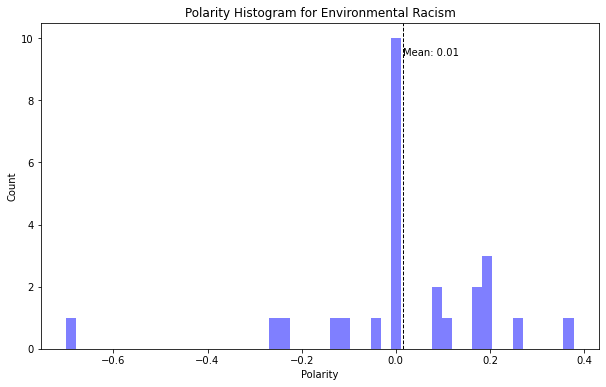

In [23]:

num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Histogram for Environmental Racism')

# add mean line
plt.axvline(df.polarity.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(df.polarity.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.polarity.mean()))

plt.show()

As we can see from the histogram, the mean polarity is -.01, so roughly neutral. This makes sense when looking at the tweets in question because there are about equal tweets that are showing the negative consequences of environmental racism and that are supporting SB467. There are no tweets explicitly against the concept of environmental racism but rather different perspectives on the issue that leads to a neutral sentiment


#### Function for Multiple Twitter Searches
In order to do this same long process for many search terms we create a function that performs each of these operations. The function find_tweets has four arguments, q for the searchterm, place for the location, distance for the radius arouund the location, and count for number of tweets. The function geocodes the place, finds the tweets and puts them in a json, and then gives a word cloud and sentiment plots. I will use this to make searches around LA County for various terms.

In [24]:
def find_tweets(q,place,distance='50km',count=500):
    
    #
    # geocode the place to get coordinates
    #
    
    g = ox.geocoder.geocode(place)
    
    # concatenate the results
    geocode = '"'+str(g[0])+','+str(g[1])+','+distance+'"'
    
    #
    # search for tweets
    #
    
    tweets = tw.Cursor(api.search,
                       q=q+' -filter:retweets', # no retweets
                       geocode=geocode, 
                       tweet_mode='extended').items(count)
    #
    # create df from json
    #
    
    json_data = [tweet._json for tweet in tweets]
    df = pd.json_normalize(json_data)

    # clean columns
    df = df[['created_at','full_text']]

    # clean the text
    df['clean_text'] = ''
    
    # loop through rows 
    for i, row in df.iterrows():
        clean = clean_tweet(row.full_text)
        df.at[i,'clean_text'] = clean

    #
    # word cloud
    #
    
    # combine tweets to one variabel
    all_text = ' '.join(df['clean_text'])
    
    # stop words
    stop_words = ['climate'] + ['climate change'] + list(STOPWORDS)
    
    # create word cloud
    wordcloud = WordCloud(width=1200, 
                          height=800,
                          background_color="beige",
                          stopwords=stop_words).generate(all_text)

    # Show the word cloud                    
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    #
    # sentiment analysis
    #
    
    # add column for polarity
    df['polarity']=''
    
    # loop polarity for each row
    for i, row in df.iterrows():
        a = TextBlob(row.full_text)
        df.at[i,'polarity'] = a.polarity
    
    # create conditions
    conditions = [
        (df['polarity'] < -0.2), # very negative
        (df['polarity'] < 0) & (df['polarity'] >= -0.2),   # negative
        (df['polarity'] == 0),  # neutral
        (df['polarity'] > 0) & (df['polarity'] <= 0.2),    # positive
        (df['polarity'] > 0.2)  # very positive
        ]

    # create values
    values = [
        'very negative', 
        'negative', 
        'neutral', 
        'positive',
        'very positive'
        ]

    # create new column with sentiment value
    df['sentiment'] = np.select(conditions, values)

    #
    # Sentiment bar chart
    #
    
    # bar chart
    fig = px.bar(df, 
                 x='sentiment',
                 width=600,
                 title='Sentiment analysis for "'+ q + '"',
                 color='sentiment',
                 category_orders = {'sentiment':['very negative','negative','neutral','positive','very positive']},
                 color_discrete_sequence=sentiment_colors) 
    
    # gets rid of horizontal white lines
    fig.update_traces(marker_line_width=0) 
    
    fig.show()

    #
    # histogram
    # 
    
    num_bins = 50
    plt.figure(figsize=(10,6))
    n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel('Polarity')
    plt.ylabel('Count')
    plt.title('Histogram of polarity for "' + q + '"')

    plt.axvline(df.polarity.mean(), color='k', linestyle='dashed', linewidth=1)

    min_ylim, max_ylim = plt.ylim()
    plt.text(df.polarity.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.polarity.mean()))

    plt.show()

    #
    # Show top 10 and bottom 10 tweets
    #
    
    # order tweets
    top10 = df.sort_values('polarity').head(10)[['clean_text','polarity']]
    bottom10 = df.sort_values('polarity').tail(10)[['clean_text','polarity']]
    
    display('Top 10 Negative Tweets')
    display(top10)
    
    display('Top 10 Positive Tweets')
    display(bottom10)

Now that the function has been created, we can easily make word clouds and do sentiment analysis on a variety of searchwords and places. The first two searches are based on the word "climate" in Downtown LA area and the Calabasas/Malibu area, two areas which have very different demographics.

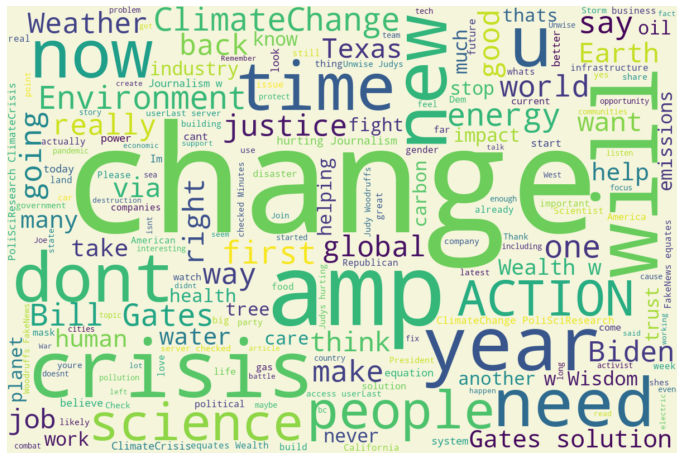

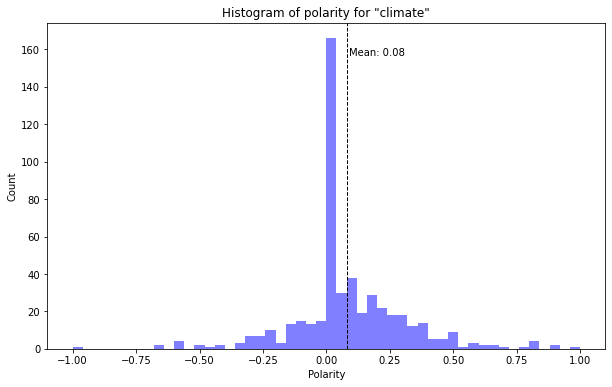

'Top 10 Negative Tweets'

clean_text  \
79                                                                                                                                                                   Of course clearing forests to grow biofuels is horrible for the environment biodiversity and climate HouseAg   
236                                                                                                                    Imagine complaining about your packages being late bc the worst climate crisis is happening in Texas rn leaving people wo homes food water and electricity   
362  I dont think ppl realize how terrifying the us is If we do nothing about climate change here the rest of the world is fucked whether they like it or not unless they take over our countrySeriously were holding a gun to the worlds head bc our ppl dont understand science   
319                                                                           Staffer Trudeau is praising Biden on his actions against climate change sometime after being unhappy with Bidens decision to suspend construction of the Keystone pipeline Thats a bit of a paradox   
227                                                                                                                                                                                                             ARCTIC At the Cutting Edge of Climate Change Arctic ClimateChange   
244                                                                                                                                    Humans dont have to be a destructive force we can be a force for nurturing discusses her novel Migrations and climate change with reporter   
310                                                                                                                                         Newsom cant protect our health and climate while giving thousands of illegal permits each year to this dirty and dangerous industry w   
298                                                                                                                                                                                                                  How Texas Power Generation Failed During the Storm in Charts   
218                                                                                                                                                       trust the science they say as they deny the benefits of masks deny climate change and fail to understand gender science   
5                                                  I h8 vegansTRANSLATIONI human amp nonhuman animal habitatspecies loss genocide amp sufferingthe climate emergencycardiovascular disease diabetes cancerpandemicsantibiotic resistancestratificationinhumane working conditions   

     polarity  
79         -1  
236     -0.65  
362 -0.644444  
319      -0.6  
227      -0.6  
244      -0.6  
310 -0.566667  
298      -0.5  
218      -0.5  
5       -0.45

'Top 10 Positive Tweets'

clean_text  \
10               This is so so good Living in LA I cant tell you how many creatives have asked me How can I use my talents as a writerdirectorphotographercomedianetc to contribute to fighting the climate crisis This climate movement is everywhere and cant be stopped now   
488                      But cleanups of some Superfund sites have been successful and some native wildlife has returned Theres much more work to do and you can help Tell your representatives that you care about cleaning these sites and educate yourself with this series   
148                                              Please watch and share this video and urge to StopLine3 Time has come to stop building more fossil fuel infrastructure Please support renewable energy and Indigenousrights ClimateCrisis climate Line3 StopLine3 WaterIsLife   
269                                                                                                                                                      do a twitter search for the words bitcoin climate or NFT climate then look thru some repliesThis is why NANO will win   
353  Thank you for reminding me of a great quote by Harlan Ellison because in no way is that what I said If you deny climate change thats on youYou are not entitled to your opinion You are entitled to your informed opinion No one is entitled to be ignorantHarlan Ellison   
226                                                                                                                                                                                          The Great Climate Bill of 2021 Is Being Shaped Now by in including a shout out to   
235                                                                                                                                                 My friend is trending and for all of the good reasons Employee n uno at Reforge now climate advocate and investor so proud   
188                                                                                                                                                                                                                                         thats from this very good piece by   
481                                                            If you donate AND win a hoodie you can also give your hoodie to ed An amazing youth climate activistIf you donate ANY AMOUNT between now and Sunday you can win a chance for campaign hoodie Woooo giving out 5   
498                                                                                                                                                                                                guy who just discovered climate change thinking he has the perfect solution   

     polarity  
10     0.6625  
488    0.6875  
148   0.78125  
269       0.8  
353       0.8  
226       0.8  
235    0.8375  
188      0.91  
481  0.916667  
498         1

In [25]:
# search for climate in Downtown LA
find_tweets(q='climate',place='90023',distance='10km')

Because of the recent events in Texas, it is expected that Texas would be prominent in the word cloud. Most of the rest of the large words are surrounding climate change and environmental justice, which was reassuring. The mean polarity was .08 so slightly positive. After lookng at the top 10 negative and positive tweets, it appears the positive tweets are more so climate change deniers and the negative ones are about climate crisis.

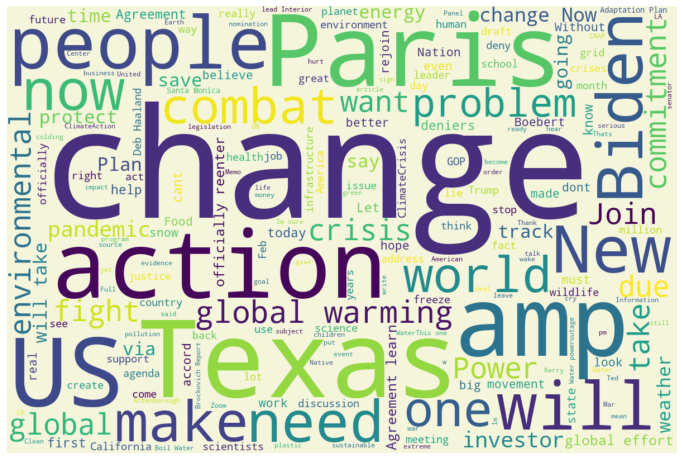

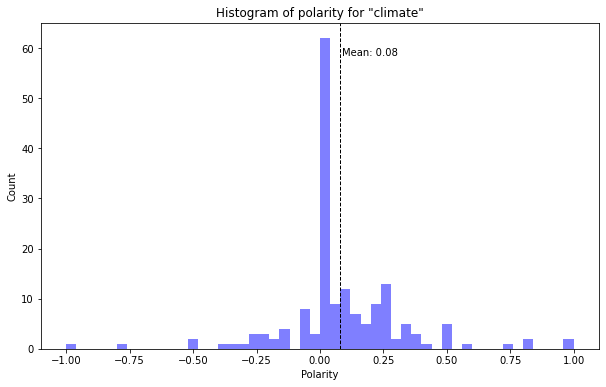

'Top 10 Negative Tweets'

clean_text  \
33                                                    Drilling in the Arctic National Wildlife Refuge is devastating for our climate wildlife amp the Indigenous peoples who depend on it Urge Congress to permanently protect the Arctic via AF   
11                                                                                                                                                                                                                     freakn nightmareholy crap   
115           Hey dipshit Its not global warming Its climate CHANGE And the fact that you use a frozen Texas to spread lies about wind energy is disgusting even for you Side note your target audience cant hear you They have no power scumbag   
10                                                                                     My generation will face the worst impacts of the climate crisis will fight to protect my future with a commitment to environmental justice ConfirmClimate   
146                                                                                                                                                  Climate change is real and those that deny it are dangerous What you dont know CAN hurt you   
96                                                                                                                                                                                                            via Hes in serious need of therapy   
94                                               The Climate Change deniers see the freezing weather in Texas as proof Global Warming is a hoaxThe freezing cold weather in Texas amp the South is bc of Climate ChangeGlobal Warming Not a HOAX   
135         Within just a few months has been a supporter of the Insurrection acquitted the inciterinchief failed to lead on the pandemic and fled the State he didnt prepare for a centuey freeze due to climate changeCall for his resignation   
15   Same The human race has gone insane Yet they do nothing about climate change which will kill billions But we grind life to a halt over a virus that is a danger only to the old and sick who instead should have been the ones to keep home   
35                                                                                                                                                                     Just get the vaccine so sad people think health and climate are political   

     polarity  
33         -1  
11       -0.8  
115      -0.5  
10       -0.5  
146  -0.36875  
96  -0.333333  
94       -0.3  
135    -0.275  
15  -0.269048  
35      -0.25

'Top 10 Positive Tweets'

clean_text  \
151  more than 99 of plastic is made from fossil fuels We cannot tackle the climate crisis without tackling plastic Will you be the climate champion that you promised amp act on the Presidential Plastics Plan PlasticFreePresident   
63                                                                                                                                                              In a desert seared by climate change burrowers fare better than birds   
89                                                                                                                                                                            jane Luna more like tuna because climate change amirite   
105                  Join and on Friday Feb 26 for Powering Resilient Cities a free webinar exploring how municipal business and energy leaders are helping cities adapt to and overcome pressures imposed by climate change and more   
117                                                              Good Lets do the work and leave the world a better place than we found it DCI US officially rejoins Paris accord vowing to make up for lost time The Washington Post   
6                                            Sir David Attenborough hits 1 million Instagram followers faster than Jennifer Anniston The worlds most beloved 94yearold naturalist says this record brings great hope and HOPE is good   
44                                                                                                                                    Watch one of the worlds great experts and naturalists on climate Sir David Attenborough Verbeek   
27                                                                                                                                               Meet Julian Brave NoiseCat the 26yearold shaping US climate policy The Correspondent   
120                                                                      Wonderful that President Biden is again part of G7 Transatlantic conference and Paris climate accord Speaks the truth as opposed to Thousands of Trumps lies   
25                                                                       PAY attention to Costa Rica the WORLD LEADER in fighting Climate Change and Biodiversity loss Impressive what this country is itself and pushing world to do   

    polarity  
151      0.5  
63       0.5  
89       0.5  
105   0.5125  
117      0.6  
6       0.75  
44       0.8  
27       0.8  
120        1  
25         1

In [26]:
find_tweets(q='climate',place='90290',distance='15km')

Though I was hoping to find some difference in sentiment between the two different neighborhoods, they have the same mean polarity and a similar spread. The only way to make any substantive comparison between the two areas is thorugh the word clouds. The words are similar in both clouds and the most noticeable distinction is the greater focus on Texas and Biden in the 90290 area. 

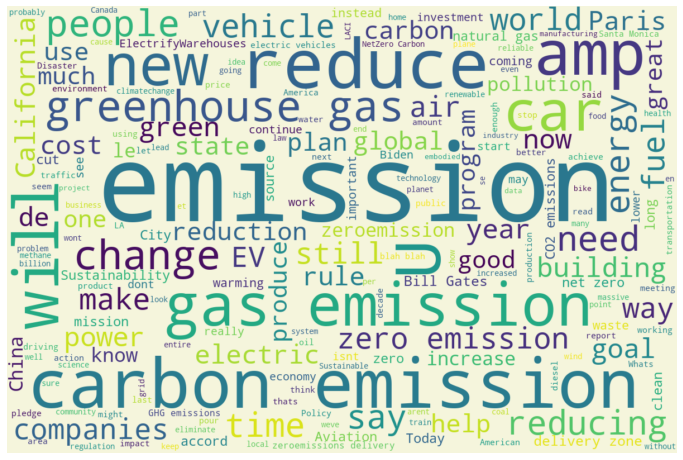

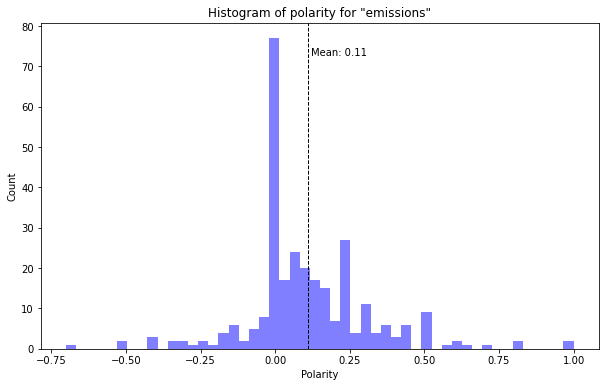

'Top 10 Negative Tweets'

clean_text  \
166                                                                                                                                                                                                               You know its bad when Bloomberg is calling you out on emissions   
100                                                                                                 Republican Sen Cassidy amp others somehow staking their arguments on the clearly erroneous claim that canceling Keystone XL will lead to increase in greenhouse gas emissions   
186                                                                                                                                                                                                       Bill Gates Goal of eliminating emissions by 2030 completely unrealistic   
239                                                                                                                                       RECLAIM phaseout will cost the So Cal oil refineries Thats what happens when you hide behind paper credits rather than reduce emissions   
120                      tells interviewers obtaining an MBA makes u a moron tells ur teen to drop out of HS floats RedPill tweets to mock his cult parlays rage into a profitmaking enterprise lies abt emissions commits tax fraud then pays off amp tripled his wealth in 2020   
43                                                                                                                      Maybe Whats also really frustrating is that California is also ignoring reducing emissions from ICEVs which are going to be on the road for years to come   
58                       Scientists have concluded that global emissions must be halved over the next decade then cut close to 0 by 2050 to avert the worst consequences of globalwarming Those consequences include deadlier wildfires heat waves droughts hurricanes amp floods   
165                                                                                                                   They granted the request with impossible or ridiculous conditions Produce the extra power with no emissions or purchase it from the grid with a 6000 markup   
59   U Yes amp science layman dont realize that what he said is nonsense theaterfix climate change eliminate emissions This is a mediafinancial interestpolitical narrative Scientists who dont have in the green or oil game look at that likeReduce pollution gt climate change   
154                                                     Wiener The idea that climate change increases cold snaps in Texas is not supported by the scientific consensus at all We need to stop emissions and Texas needs to weatherize their grid but those are not related points   

     polarity  
166      -0.7  
100      -0.5  
186      -0.5  
239      -0.4  
120      -0.4  
43       -0.4  
58  -0.333333  
165 -0.333333  
59       -0.3  
154      -0.3

'Top 10 Positive Tweets'

clean_text  \
96                                                                                                                                                                                                           A visit to my carbon emissions my favorite Science Journalist   
219                             yeah in California you have to like change out whole parts of the emissions systems no matter what age they are Its a bummer I did used to have an Infiniti M30 that was pretty great Impressive driving experience for basically a Sentra   
80                                                                                                                                                                                       And the Carbon that will effectively raise food prices without lowering emissions   
39                                                                                                         Im sure Steve Lee from SQ will have something good to say about this but ICYMI todays writeup on s launch includes a nod to the issue Stripe mafia representing   
275  Reliable Durable Hassle FreeBYDs iron phosphate batteries run strong like propane with no toxic emissions or maintenance requiredBYDs 100 electric forklifts let you get the job done and do good for the environmentThat deserves a toast Happy NationalDrinkWineDay   
103                                                                                                       From oars to sail to coal to bunker fuel oil to diesel oil to LNG to wind again Good news for CO2 emissions Wallenius Wilhelmsen reveals windpowered roro vessel   
107                                                            farmers are asking to invest 300M in Budget2021 to reduce ag emissions by 10 megatonnesProud to launch 6 policy proposals w on CdnAgDay that support farmers to implement climatefriendly farming practices   
41                                                                                                                                                                                                                                                man I miss emissions lol   
151                                                               Sustainable aviation fuel is emerging as the best approach to reduce GHG emissions from the aviation sector but there are limitations ACTNews Sustainability AltFuels CleanTech Transportation AirTravel   
150                                                    Sustainable aviation fuel is emerging as the best approach to reduce GHG emissions from the aviation sector but there are limitations Consulting ACTNews Sustainability AltFuels CleanTech Transportation AirTravel   

     polarity  
96        0.5  
219    0.5625  
80        0.6  
39        0.6  
275  0.627083  
103       0.7  
107       0.8  
41        0.8  
151         1  
150         1

In [27]:
# search emissions in LA
find_tweets(q='emissions',place='90023')

I decided to do a search on emissions in all of Los Angeles County to see if there are any interesting results. The word cloud shows mostly words surrounding emissions and climate change. Also, Bill Gates has been in each of the past three clouds because of his recent statements about achieving zero emissions. The polarity is similar to the searches for "climate".

### Twitter Scraping for Exide Contamination
My original idea for Twitter analysis was to find tweets surrounding the Exide lead contamination in Vernon, CA that has impacted the mostly hispanic community for years. However, due to the limitations of the Twitter API, I could not find any substantive tweets about this scandal within the past 7 days. So, after searching for a work around, I found a [GitHub](https://github.com/itsayushisaxena/Get_Old_Tweets-Python) with a solution using a social media scraper called SNScraper along with tweepy. I used command line of the form "snscrape twitter-seach "searchterm since:YYYY:MM:DDD until:YYYY:MM:DDDD" near:"Los Angeles" > scraped_tweets.txt". This script created a .txt file containing the url for each tweet in my query. My queries were from October of 2020 when Exide was allowed to abandon the cleanup after filinf for bankruptcy and in March of 2016 when health officials began testing for lead contamination in nearby homes.

The cell below contains code from the aforementioned GitHub repo that is meant to take the twitter urls in the .txt file and create a csv that contains the text and date of the tweet. This will then be converted into a dataframe so we can do sentiment analysis and make word clouds. (I mostly understand this code but would not be able to do this on my own by any means)

In [28]:
# code from github

tweet_url = pd.read_csv("scraped_tweets.txt", index_col= None, header = None, names = ["tweet_urls"])
tweet_url.head()

# Extract the tweet id, 
af = lambda x: x["tweet_urls"].split("/")[-1]
# store tweet id in another column
tweet_url['tweet_id'] = tweet_url.apply(af, axis=1)

ids = tweet_url['tweet_id'].tolist()

total_count = len(ids)
chunks = (total_count - 1) // 50 + 1
chunks


# we can finally create our function that would extract all the elements that we need from the tweet. 
# Here, only the tweet id, tweet time and the tweet itself is required.
def fetch_tw(ids):
    tw_statuses = api.statuses_lookup(ids, tweet_mode= "extended")
    data = pd.DataFrame()
    for status in tw_statuses:
            tweet_elem = {"tweet_id": status.id,
                     "tweet":status.full_text,
                     "date":status.created_at}
            data = data.append(tweet_elem, ignore_index = True)
    data.to_csv("scraped_tweets.csv", mode="a")
    

# We'll process only 50 entries because the statuses_lookup() method gives the statuses of IDs, up to 100 only..
for i in range(chunks):
        lst = ids[i*50:(i+1)*50]
        result = fetch_tw(lst)

Now that we have a csv with the tweets, we can read in the csv to analyze. After this step, the code is essentially the same as used before.

In [29]:
# read in csv 
scraped_tweets = pd.read_csv('scraped_tweets.csv')
scraped_tweets.head()

Unnamed: 0                 date  \
0         0.0  2020-10-19 19:59:57   
1         1.0  2020-10-19 17:47:56   
2         2.0  2020-10-19 22:17:25   
3         3.0  2020-10-19 04:25:26   
4         4.0  2020-10-19 19:04:45   

                                                                                                                                                                                                                                                                                          tweet  \
0    @safiranand Exide Industries - future looks bright with vehicles turning to electric. Good fundamentals as well and management is decent.\nLarsen - Government will certainly bring up infra if growth of the country is taken into account.\nHeidelberg Cement - similar points to Larsen   
1       In 2015, Exide Technologies admitted to years of environmental crimes. Execs avoided prosecution by agreeing to demolish toxic battery plant and clean up nearby yards.\n\nFed judge, with blessing of Trump administration, just stuck taxpayers with the tab. https://t.co/01OjiNX3UF   
2                  Happy birthday to the most husmukh guy(NARENDRA MODI) . You are such an amazing person. You are the most talented guy per ek cheez h we love congress more. Hahaha\nHappy birthday again.#mukundsharma #johnsnow #got #exide #crimepartner #srhlover https://t.co/Jsr2LI5cvg   
3                                                                                                                                                                                 Exide Bankruptcy Leaves Toxic Site as California’s Problem    https://t.co/ptnaPiZYhF https://t.co/FADYM2mvew   
4  Turn up the volume! \nBCP of Jax., Inc. has full line of Exide AGM batteries that come with 4 year free replacement warranty and excellent quality for your sound!\n.\n.\n.\n#bcpofjax #allwedoisbatteries #jacksonvillebatteryshop #batteryshop #batteriesconnectio…https://t.co/L1zibR5JF7   

                 tweet_id  
0  1.3182807501190963e+18  
1   1.318247524801663e+18  
2  1.3183153430061998e+18  
3  1.3180455678435205e+18  
4   1.318266858001232e+18

In [30]:
# limit columns
scraped_tweets = scraped_tweets[['date','tweet']]
# rename columns to match previously used names
scraped_tweets.columns = ['created_at','text']

In [31]:
# create column for cleaned text 
scraped_tweets['clean_text'] = ''
# loop through rows cleaning tweets
for i, row in scraped_tweets.iterrows():
    clean = clean_tweet(row.text)
    scraped_tweets.at[i,'clean_text'] = clean

In [32]:
# put all tweets in one variable
all_text = ''.join(scraped_tweets['clean_text'])
all_text

'Exide Industries future looks bright with vehicles turning to electric Good fundamentals as well and management is decentLarsen Government will certainly bring up infra if growth of the country is taken into accountHeidelberg Cement similar points to LarsenIn 2015 Exide Technologies admitted to years of environmental crimes Execs avoided prosecution by agreeing to demolish toxic battery plant and clean up nearby yardsFed judge with blessing of Trump administration just stuck taxpayers with the tabHappy birthday to the most husmukh guyNARENDRA MODI You are such an amazing person You are the most talented guy per ek cheez h we love congress more HahahaHappy birthday againmukundsharma johnsnow got exide crimepartner srhloverExide Bankruptcy Leaves Toxic Site as Californias ProblemTurn up the volume BCP of Jax Inc has full line of Exide AGM batteries that come with 4 year free replacement warranty and excellent quality for your soundbcpofjax allwedoisbatteries jacksonvillebatteryshop batt

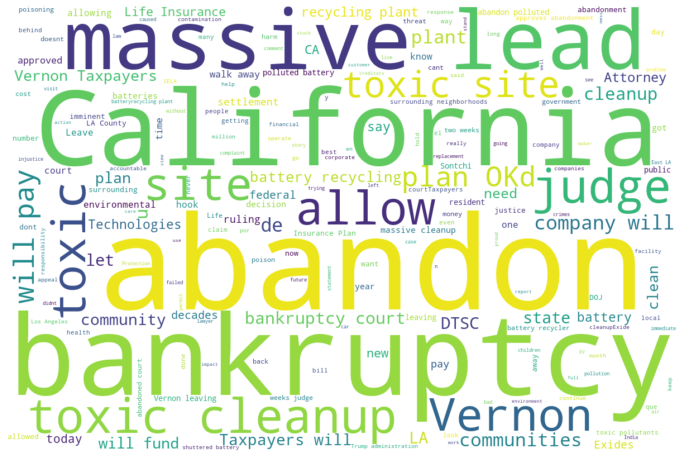

In [33]:
list(STOPWORDS)
stop_words = ['exide'] + ['amp'] + list(STOPWORDS)

wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words,
                      max_words=200).generate(all_text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As mentioned earlier, this scrape is of October 2020. For context, Exide was in bankruptcy proceedings that allowed the company to avoid paying for the cleanup of their battery waste. This is reflected in the word cloud above, in which "bankruptcy" and "abandon" are the largest words. Additionally, the fact that the cleanup cost will fall on taxpayers is reflected here. Surprisingly, although the affected community is a predominantly working-class and hispanic community, there is no reference to environmental racism and justice in the top 100 words of these tweets. I would have expected there to be more mention of the communities affected, though it does make sense that the focus would be on the new information that came out during this period.

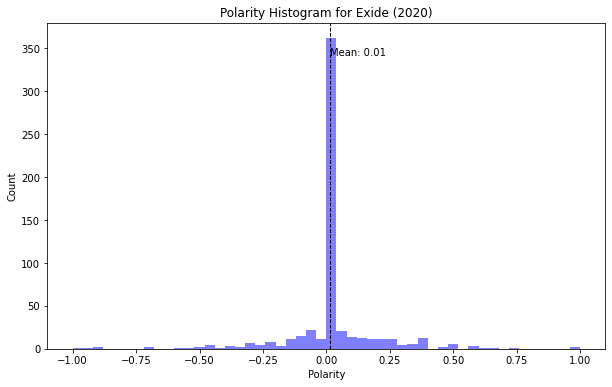

In [34]:
scraped_tweets['polarity']=''

# loop TextBlob through each row 
for i, row in scraped_tweets.iterrows():
    a = TextBlob(row.clean_text)
    scraped_tweets.at[i,'polarity'] = a.polarity
    
# list of sentiment conditions
conditions = [
    (scraped_tweets['polarity'] < -0.2), 
    (scraped_tweets['polarity'] < 0) & (scraped_tweets['polarity'] >= -0.2),   
    (scraped_tweets['polarity'] == 0),  #
    (scraped_tweets['polarity'] > 0) & (scraped_tweets['polarity'] <= 0.2),    
    (scraped_tweets['polarity'] > 0.2)  ]

# list of sentiment values
values = [
    'very negative', 
    'negative', 
    'neutral', 
    'positive',
    'very positive'
    ]

# use values and conditions to fill sentiment column 
scraped_tweets['sentiment'] = np.select(conditions, values)
# create sentiment bar chart
fig = px.bar(scraped_tweets, 
             x='sentiment',
             width=600,
             title='Sentiment analysis for Exide (2020)',
             color='sentiment',
             category_orders = {'sentiment':['very negative','negative','neutral','positive','very positive']},
             color_discrete_sequence=sentiment_colors, 
            )
# remove white lines through plot
fig.update_traces(marker_line_width=0) 
fig.show()

num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(scraped_tweets.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Histogram for Exide (2020)')

plt.axvline(scraped_tweets.polarity.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(scraped_tweets.polarity.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(scraped_tweets.polarity.mean()))

plt.show()

As we can see, there is little difference in the polarity of the tweets, with most being neutral. This makes sense because, as previously mentioned, most of the tweets about Exide at this time were informational. Certainly there were tweets expressing their negative feelings towards Exide, but the predominant sentiment was neutral.

Next, I just reran all of the above cells for scraped_tweets2.text, which is the March 2016 tweets. (I could not figure out how to use a function with file names as the argument)

In [35]:

tweet_url = pd.read_csv("scraped_tweets2.txt", index_col= None, header = None, names = ["tweet_urls"])
tweet_url.head()

# Extract the tweet id, 
af = lambda x: x["tweet_urls"].split("/")[-1]
# store tweet id in another column
tweet_url['tweet_id'] = tweet_url.apply(af, axis=1)

ids = tweet_url['tweet_id'].tolist()

total_count = len(ids)
chunks = (total_count - 1) // 50 + 1
chunks


# we can finally create our function that would extract all the elements that we need from the tweet. 
# Here, only the tweet id, tweet time and the tweet itself is required.
def fetch_tw(ids):
    tw_statuses = api.statuses_lookup(ids, tweet_mode= "extended")
    data = pd.DataFrame()
    for status in tw_statuses:
            tweet_elem = {"tweet_id": status.id,
                     "tweet":status.full_text,
                     "date":status.created_at}
            data = data.append(tweet_elem, ignore_index = True)
    data.to_csv("scraped_tweets2.csv", mode="a")
    

# We'll process only 50 entries because the statuses_lookup() method gives the statuses of IDs, up to 100 only..
for i in range(chunks):
        lst = ids[i*50:(i+1)*50]
        result = fetch_tw(lst)

In [36]:
scraped_tweets2 = pd.read_csv('scraped_tweets2.csv')
scraped_tweets2.head()

Unnamed: 0                 date  \
0         0.0  2016-04-19 15:30:56   
1         1.0  2016-04-19 08:24:59   
2         2.0  2016-04-19 23:07:21   
3         3.0  2016-04-19 21:55:41   
4         4.0  2016-04-19 21:51:45   

                                                                                                                                       tweet  \
0  VIDEO: $176.6m Funds Approved for Exide Lead Acid Battery Recycling Site in Vernon: SB 93 sti... https://t.co/w7V6Glgshu #LeadAcidBattery   
1                             PIESAUTO - Exide la technologie à votre service\nPlus d'info : https://t.co/P87wOxsIQP https://t.co/porqU1SR6i   
2         RELEASE: Senate Approves Pro Tem De León’s Exide Cleanup Funds Bill, On to the Governor. Thanks @kdeleon ! https://t.co/pWg0HDfWNx   
3                        We're having a spot of bother with our Exide battery, need to find some good electricity... https://t.co/dZMwq9A9Jr   
4                                                         State Senate approved $177M for exide cleanup https://t.co/QUu43QlstK @sc_pr #ceqa   

                tweet_id  
0  7.224473986440233e+17  
1  7.223402034998108e+17  
2   7.22562256601387e+17  
3  7.225442231956357e+17  
4  7.225432315865457e+17

In [37]:
scraped_tweets2 = scraped_tweets2[['date','tweet']]
scraped_tweets2.columns = ['created_at','text']

In [38]:
scraped_tweets2['clean_text'] = ''
for i, row in scraped_tweets2.iterrows():
    clean = clean_tweet(row.text)
    scraped_tweets2.at[i,'clean_text'] = clean

In [39]:
all_text = ''.join(scraped_tweets2['clean_text'])
all_text

'VIDEO 1766m Funds Approved for Exide Lead Acid Battery Recycling Site in Vernon SB 93 sti LeadAcidBatteryPIESAUTO Exide la technologie votre servicePlus dinfoRELEASE Senate Approves Pro Tem De Lens Exide Cleanup Funds Bill On to the Governor ThanksWere having a spot of bother with our Exide battery need to find some good electricityState Senate approved 177M for exide cleanup pr ceqaState Senate approves 177 million for Exide cleanup OpChemtrailsExidejpgVIDEO 1766m Funds Approved for Exide Lead Acid Battery Recycling Site in Vernon Californias State SenateHey LastWeekTonight why leave out Exide and years of lead contamination of community after community across USCalifornia legislature approves 177 million for Exide cleanup via capolitics cities environment toxicsHeadlines Gateway COG snub Exide transpo investment Beverly Hills MASS carnage Dodgers parking moreCALeg Senate approves 177 million 4 Exide cleanup This brings much needed environmental justice to the familiesState Senate ap

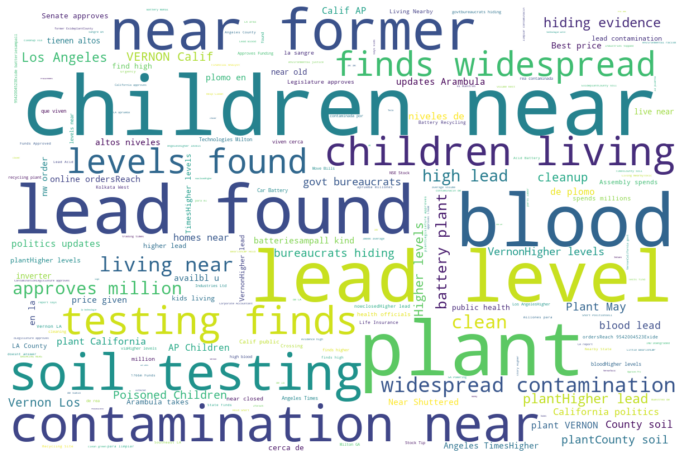

In [40]:
list(STOPWORDS)
stop_words = ['exide'] + ['amp'] + list(STOPWORDS)

wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words,
                      max_words=200).generate(all_text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This word cloud shows a drastically different result than the one from 2020. At this time, results of lead testing in the affected houses showed that there was significant contamination. As a result, CA lawmakers approved funding to clean the site. Both of these events take up the majority of the word cloud. Again, there is little mention of environmental racism. However, there is a focus on those affected by the contamination, nearby children most prominently, rather than on costs to taxpayers. 

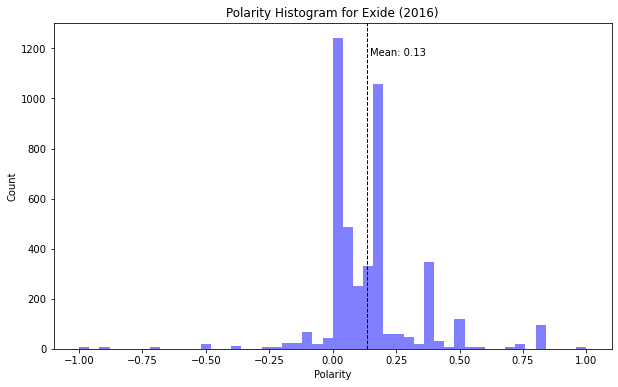

In [41]:
scraped_tweets2['polarity']=''

# loop TextBlob through each row 
for i, row in scraped_tweets2.iterrows():
    a = TextBlob(row.clean_text)
    scraped_tweets2.at[i,'polarity'] = a.polarity
    
# list of sentiment conditions
conditions = [
    (scraped_tweets2['polarity'] < -0.2), 
    (scraped_tweets2['polarity'] < 0) & (scraped_tweets2['polarity'] >= -0.2),   
    (scraped_tweets2['polarity'] == 0),  #
    (scraped_tweets2['polarity'] > 0) & (scraped_tweets2['polarity'] <= 0.2),    
    (scraped_tweets2['polarity'] > 0.2)
]

# list of sentiment values
values = [
    'very negative', 
    'negative', 
    'neutral', 
    'positive',
    'very positive'
    ]

# use values and conditions to fill sentiment column 
scraped_tweets2['sentiment'] = np.select(conditions, values)
# create sentiment bar chart
fig = px.bar(scraped_tweets2, 
             x='sentiment',
             width=600,
             title='Sentiment analysis for Exide (2016)',
             color='sentiment',
             category_orders = {'sentiment':['very negative','negative','neutral','positive','very positive']},
             color_discrete_sequence=sentiment_colors, 
            )
# remove white lines through plot
fig.update_traces(marker_line_width=0) 
fig.show()

num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(scraped_tweets2.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Histogram for Exide (2016)')

plt.axvline(scraped_tweets2.polarity.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(scraped_tweets2.polarity.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(scraped_tweets2.polarity.mean()))

plt.show()

Surpirsingly, the results of the polarity in 2016 are more positive than in 2020. Looking at the word clouds, I would have expected the opposite. In 2016, the word cloud is filled with children getting lead poisoned and in 2020, it's about bankruptcy. The most surprising pat is the spread in 2016 compared to in 2020. The mean is significantly more positive and there is slightly more variation. This could likely be explained by hopeful tweets about the state's plan to pay for the cleanup. Many of the tweets are likely informational, but I would have expected significantly more negative tweets when health officials reveal substantial lead contamination.

Although I was hoping to find a larger connection to environmental justice through this analysis, it still adds to my final project. By looking at older tweets, I was able to gain more context on the Exide contamination that is the most recent and significant example of environmental racism in Los Angeles. I did not many explicit mentions of environmental justice when looking through the tweets, though that link can be established through other methods